In [1]:
import pandas as pd
import seaborn as sns 

from tickets.utils import *
from tickets.stack_overlflow import * 
from collections import Counter
import numpy as np
import statsmodels.api as sm
import matplotlib
import warnings
import itertools
from pylab import rcParams

In [2]:
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

In [3]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df = load_and_preprocess_so_tickets_data("stackoverflow-data-idf.json", tqdmnb=True)

Schema:

 accepted_answer_id          float64
answer_count                  int64
body                         object
comment_count                 int64
community_owned_date         object
creation_date                object
favorite_count              float64
id                            int64
last_activity_date           object
last_edit_date               object
last_editor_display_name     object
last_editor_user_id         float64
owner_display_name           object
owner_user_id               float64
post_type_id                  int64
score                         int64
tags                         object
title                        object
view_count                    int64
dtype: object
Number of questions,columns= (20000, 19)



Cleaning body texts: 



Cleaning title texts: 


In [5]:
X_train_counts, X_train_tfidf, count_vectorizer, tfidf_transformer = train_so_tfidf(df)

In [6]:
show_random_so_ticket(df, count_vectorizer, tfidf_transformer)


=====Title=====
How to send values to from android to a html page in webview

=====Body=====
<p>I need to pass a value from java to the html in android.
i am having a list view, from which i am selecting a particular item,
the selected item should appear on the html page in a webview
is there any way to do it in android, kindly help me please,
i have searched many websites but all got in vain, </p>

<p>Thanks and Regards</p>

<p>rajesh</p>

===Tags===

android

===Keywords===
webview: 0.428
android: 0.361
html: 0.303
vain: 0.265
item: 0.252
kindly: 0.215
websites: 0.213
page: 0.208
selecting: 0.194
regards: 0.184
searched: 0.174
particular: 0.159
appear: 0.157
selected: 0.149
pass: 0.137
send: 0.134
got: 0.124
having: 0.121
java: 0.112
values: 0.112


In [7]:
df.head()

accepted_answer_id  answer_count  \
0                 NaN             1   
1           3367943.0             2   
2                 NaN             0   
3                 NaN             1   
4          19941620.0             5   

                                                body  comment_count  \
0  <p>I have a public class that contains a priva...              0   
1  <p>I have the following HTML:</p>\n\n<pre><cod...              2   
2  <p>I'm trying to run a shell script with gradl...              2   
3  <p>I have an object with the following form.</...              1   
4  <p>Hi I need to valid the href is empty or not...              1   

  community_owned_date                creation_date  favorite_count        id  \
0                  NaN  2011-01-27 20:19:13.563 UTC             NaN   4821394   
1                  NaN    2010-07-30 00:01:50.9 UTC             0.0   3367882   
2                  NaN   2015-07-28 16:30:18.28 UTC             NaN  31682135   
3                  NaN  2013-11-26 13:34:49.957 UTC             1.0  20218536   
4                  NaN   2013-11-12 22:41:36.11 UTC             NaN  19941459   

            last_activity_date               last_edit_date  ...  \
0   2011-01-27 20:21:37.59 UTC                          NaN  ...   
1  2012-05-10 14:16:05.143 UTC  2012-05-10 14:16:05.143 UTC  ...   
2  2015-07-28 16:32:15.117 UTC                          NaN  ...   
3    2013-11-26 15:07:50.8 UTC  2013-11-26 15:02:47.993 UTC  ...   
4   2013-11-12 23:48:34.67 UTC   2013-11-12 22:43:42.97 UTC  ...   

  owner_display_name  owner_user_id post_type_id  score  \
0                          163534.0            1      0   
1                            1190.0            1      2   
2                         1299158.0            1      1   
3                          642751.0            1      0   
4                          819774.0            1      0   

                                       tags  \
0        c#|serialization|xml-serialization   
1               css|overflow|css-float|crop   
2          bash|shell|android-studio|gradle   
3  javascript|asynchronous|foreach|async.js   
4                                javascript   

                                               title view_count  \
0     Serializing a private struct - Can it be done?        296   
1  How do I prevent floated-right content from ov...       4121   
2                                Gradle command line        259   
3  Loop variable as parameter in asynchronous fun...        120   
4                           Canot get the href value         97   

                                          clean_body  \
0  i have a public class that contains a private ...   
1  i have the following html: td class a img src ...   
2  i m trying to run a shell script with gradle. ...   
3  i have an object with the following form. sort...   
4  hi i need to valid the href is empty or not on...   

                                         clean_title  \
0       serializing a private struct can it be done?   
1  how do i prevent floated right content from ov...   
2                                gradle command line   
3  loop variable as parameter in asynchronous fun...   
4                           canot get the href value   

                                    clean_title_body  
0  serializing a private struct can it be done?. ...  
1  how do i prevent floated right content from ov...  
2  gradle command line. i m trying to run a shell...  
3  loop variable as parameter in asynchronous fun...  
4  canot get the href value. hi i need to valid t...  

[5 rows x 22 columns]

In [8]:
df.count()

accepted_answer_id          10711
answer_count                20000
body                        20000
comment_count               20000
community_owned_date           15
creation_date               20000
favorite_count               4471
id                          20000
last_activity_date          20000
last_edit_date              10708
last_editor_display_name    20000
last_editor_user_id         10595
owner_display_name          20000
owner_user_id               19762
post_type_id                20000
score                       20000
tags                        20000
title                       20000
view_count                  20000
clean_body                  20000
clean_title                 20000
clean_title_body            20000
dtype: int64

In [9]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf_50 = svd.fit_transform(X_train_tfidf)

In [10]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(svd_tfidf_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.083s...
[t-SNE] Computed neighbors for 20000 samples in 54.433s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for s

In [11]:
tsne_tfidf_df = pd.DataFrame(tsne_results)
tsne_tfidf_df.columns = ['rx', 'ry']

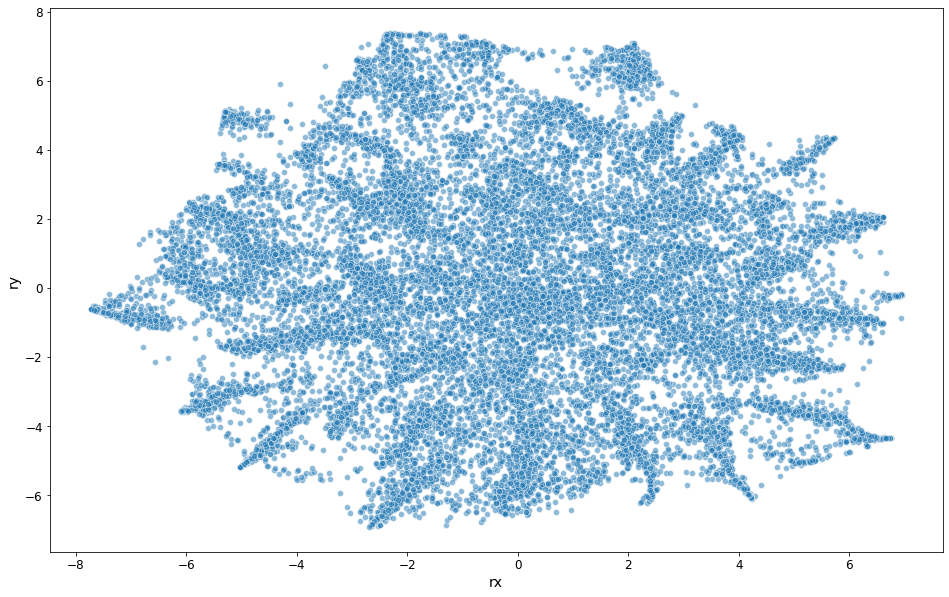

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="rx", y="ry",
    #hue="y",
    palette=sns.color_palette("hls", 2),
    data=tsne_tfidf_df,
    legend="full",
    alpha=0.5
)

In [13]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, random_state=0)
svd_tfidf_300 = svd.fit_transform(X_train_tfidf)

In [16]:
from sklearn.cluster import AffinityPropagation
affinity_model = AffinityPropagation(
    affinity='euclidean', convergence_iter=15, copy=True, damping=0.5, max_iter=200, preference=None, verbose=False
)


In [17]:
clustering = affinity_model.fit(svd_tfidf_300)

In [18]:
clusters = clustering.predict(svd_tfidf_300)

In [25]:
cluster_df = tsne_tfidf_df.copy()
cluster_df['cluster'] = clusters
cluster_df['cluster'] = cluster_df['cluster'].map(str)
cluster_df['text'] = df['clean_title_body']
cluster_df['tags'] = df['tags']
cluster_df['title'] = df['title']

In [26]:
groups = cluster_df.groupby('cluster')
cluster_sizes = cluster_df.groupby('cluster').size().sort_values(ascending=False)
groups = list(sorted(groups, 
       key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
       reverse=True
))  # reverse the sort i.e. largest first

In [27]:

traces = []

for name, group in groups:
    # ax.plot(group.x, group.y, marker='o', linestyle='', label=name)
    trace0 = go.Scatter(x=group.rx, y=group.ry,
                    mode='markers', name=name,
                    text=list(group['title'].values))
    traces.append(trace0)


fig = go.Figure(data=traces)
offline.iplot(fig)

In [31]:
print("Total number of clusters found: {}".format(len(groups)))

Total number of clusters found: 679
